# Testing MegaBinary Operations

In [1]:
from bizarromath.meganumber.mega_binary import MegaBinary

## Addition

In [2]:
a = MegaBinary("1010")
b = MegaBinary("1100")
c = a.add(b)
print("1010 + 1100 =", c.to_string())

1010 + 1100 = 10110


## Subtraction

In [3]:
a = MegaBinary("1100")
b = MegaBinary("1010")
c = a.sub(b)
print("1100 - 1010 =", c.to_string())

1100 - 1010 = 10


## Multiplication

In [4]:
a = MegaBinary("1010")
b = MegaBinary("1100")
product = a.mul(b)
print("1010 * 1100 =", product.to_string())

1010 * 1100 = 1111000


## Division

In [5]:
a = MegaBinary("1100")
b = MegaBinary("1010")
quotient = a.div(b)

# Handle both MegaBinary and MegaFloat return types
if hasattr(quotient, 'to_string'):
    result = quotient.to_string()
else:
    result = quotient.to_decimal_string()
    
print("1100 / 1010 =", result)

1100 / 1010 = 1


## Byte Array Input/Output

In [6]:
# Test bytearray input
data = bytearray([0x0A, 0x0B, 0x0C])  # 10, 11, 12 in hex
binary = MegaBinary(data)
print("Original bytes:", data)
print("As binary string:", binary.to_string())
print("Back to bytes:", binary.to_bytes())
print("Byte values match:", data == binary.to_bytes())

Original bytes: bytearray(b'\n\x0b\x0c')
As binary string: 000010100000101100001100
Back to bytes: bytearray(b'\n\x0b\x0c')
Byte values match: True


In [7]:
# Test bytes input with arithmetic
a = MegaBinary(bytes([0x55]))  # 01010101 in binary
b = MegaBinary(bytes([0xAA]))  # 10101010 in binary

# Addition
sum_result = a.add(b)
print("0x55 + 0xAA =", hex(int(sum_result.to_bytes()[0])))

# XOR test (if implemented)
if hasattr(MegaBinary, 'xor'):
    xor_result = a.xor(b)
    print("0x55 XOR 0xAA =", hex(int(xor_result.to_bytes()[0])))

# Binary pattern test
print("\nBinary patterns:")
print(f"a: {a.to_string()}")
print(f"b: {b.to_string()}")
print(f"sum: {sum_result.to_string()}")

0x55 + 0xAA = 0xff

Binary patterns:
a: 01010101
b: 10101010
sum: 11111111


In [8]:
# Test prime number sequence
prime_numbers = [2, 3, 5, 7, 11, 13]
byte_array = bytearray(prime_numbers)
binary = MegaBinary(byte_array)

print("Prime numbers:", prime_numbers)
print("As bytearray:", byte_array)
print("As binary string:", binary.to_string())
print("Recovered bytes:", list(binary.to_bytes()))
print("Values preserved:", list(binary.to_bytes()) == prime_numbers)

Prime numbers: [2, 3, 5, 7, 11, 13]
As bytearray: bytearray(b'\x02\x03\x05\x07\x0b\r')
As binary string: 000000100000001100000101000001110000101100001101
Recovered bytes: [2, 3, 5, 7, 11, 13]
Values preserved: True


## Binary to Float Conversion

In [9]:
from bizarromath.meganumber.mega_float import MegaFloat

# Create binary numbers
numerator = MegaBinary(bytes([0xFF, 0x00]))    # 1111 1111 0000 0000
denominator = MegaBinary(bytes([0x10]))        # 0001 0000

# Perform division to get float
result = numerator.div(denominator)

print(f"Binary numerator: {numerator.to_string()}")
print(f"Binary denominator: {denominator.to_string()}")
print(f"Result as float: {result.to_decimal_string()}")
print(f"Verification: {int(numerator.to_string(), 2)} / {int(denominator.to_string(), 2)} = {int(numerator.to_string(), 2) / int(denominator.to_string(), 2)}")

# Convert back to binary
binary_result = MegaBinary(bin(int(float(result.to_decimal_string())))[2:])
print(f"\nBack to binary: {binary_result.to_string()}")

# Show as bytes
print(f"Original bytes: {numerator.to_bytes().hex()} / {denominator.to_bytes().hex()}")
print(f"Result bytes: {binary_result.to_bytes().hex()}")

Binary numerator: 1111111100000000
Binary denominator: 00010000
Result as float: 4080
Verification: 65280 / 16 = 4080.0

Back to binary: 111111110000
Original bytes: ff00 / 10
Result bytes: ff00



Plotting xor interference:


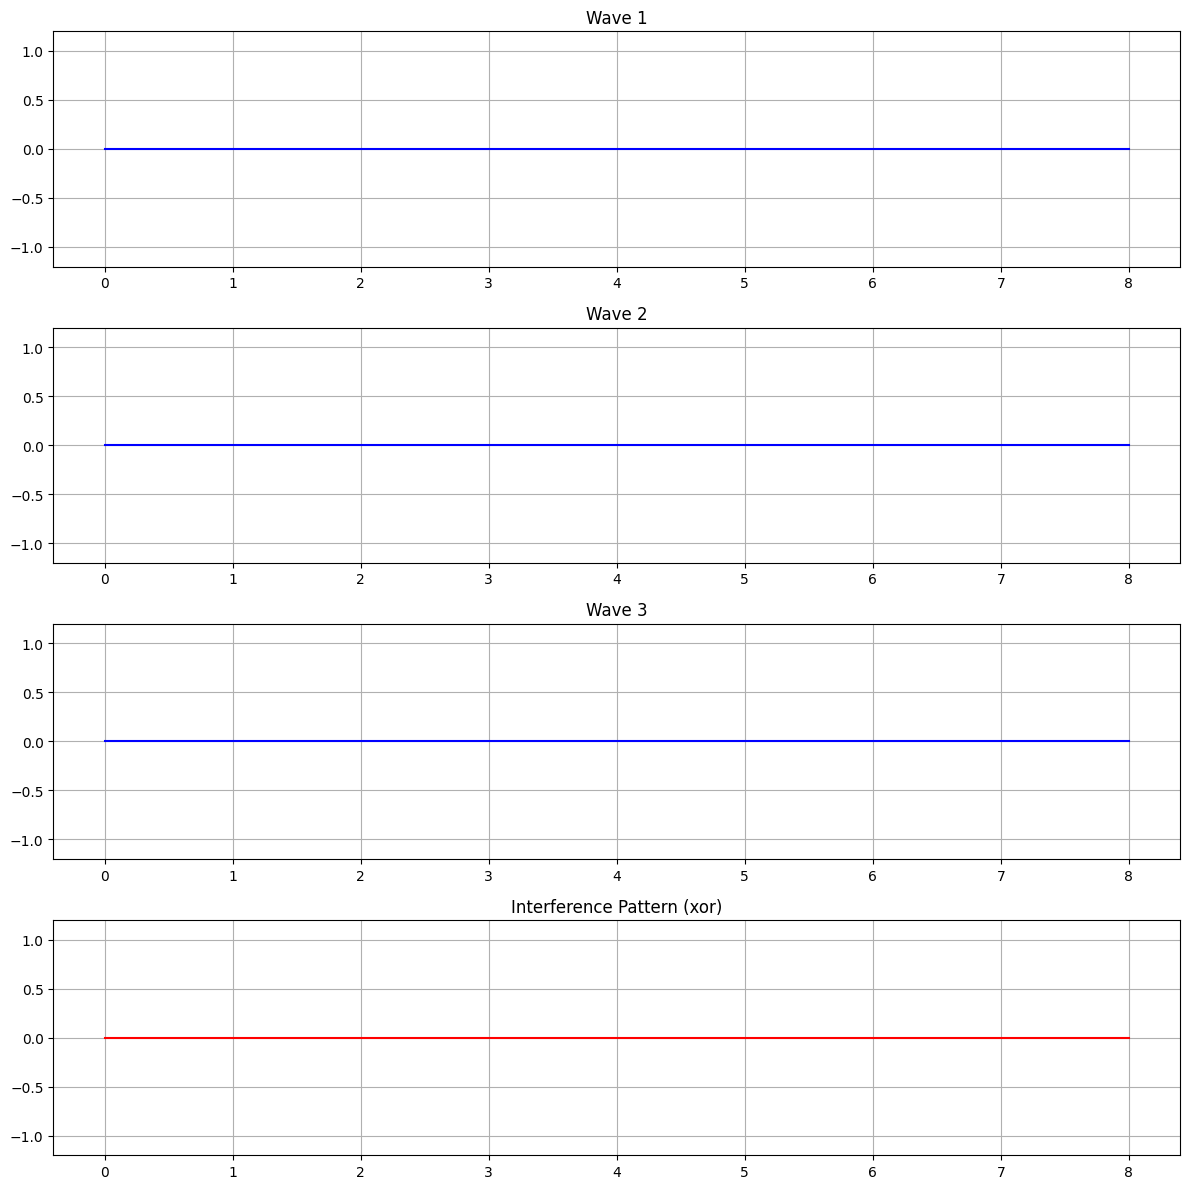


Plotting and interference:


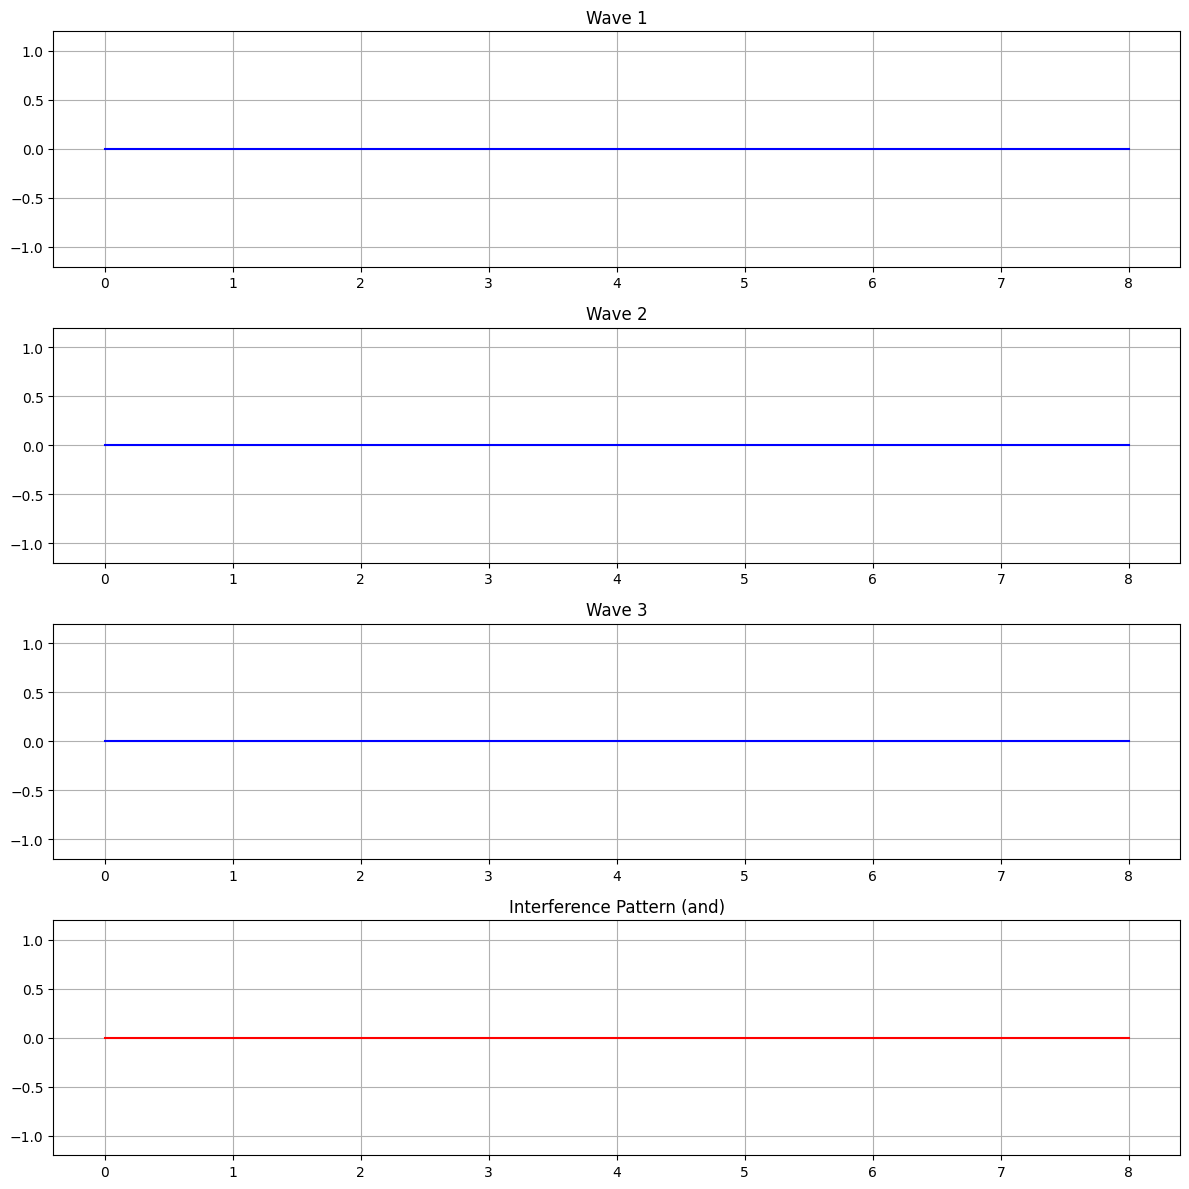


Plotting or interference:


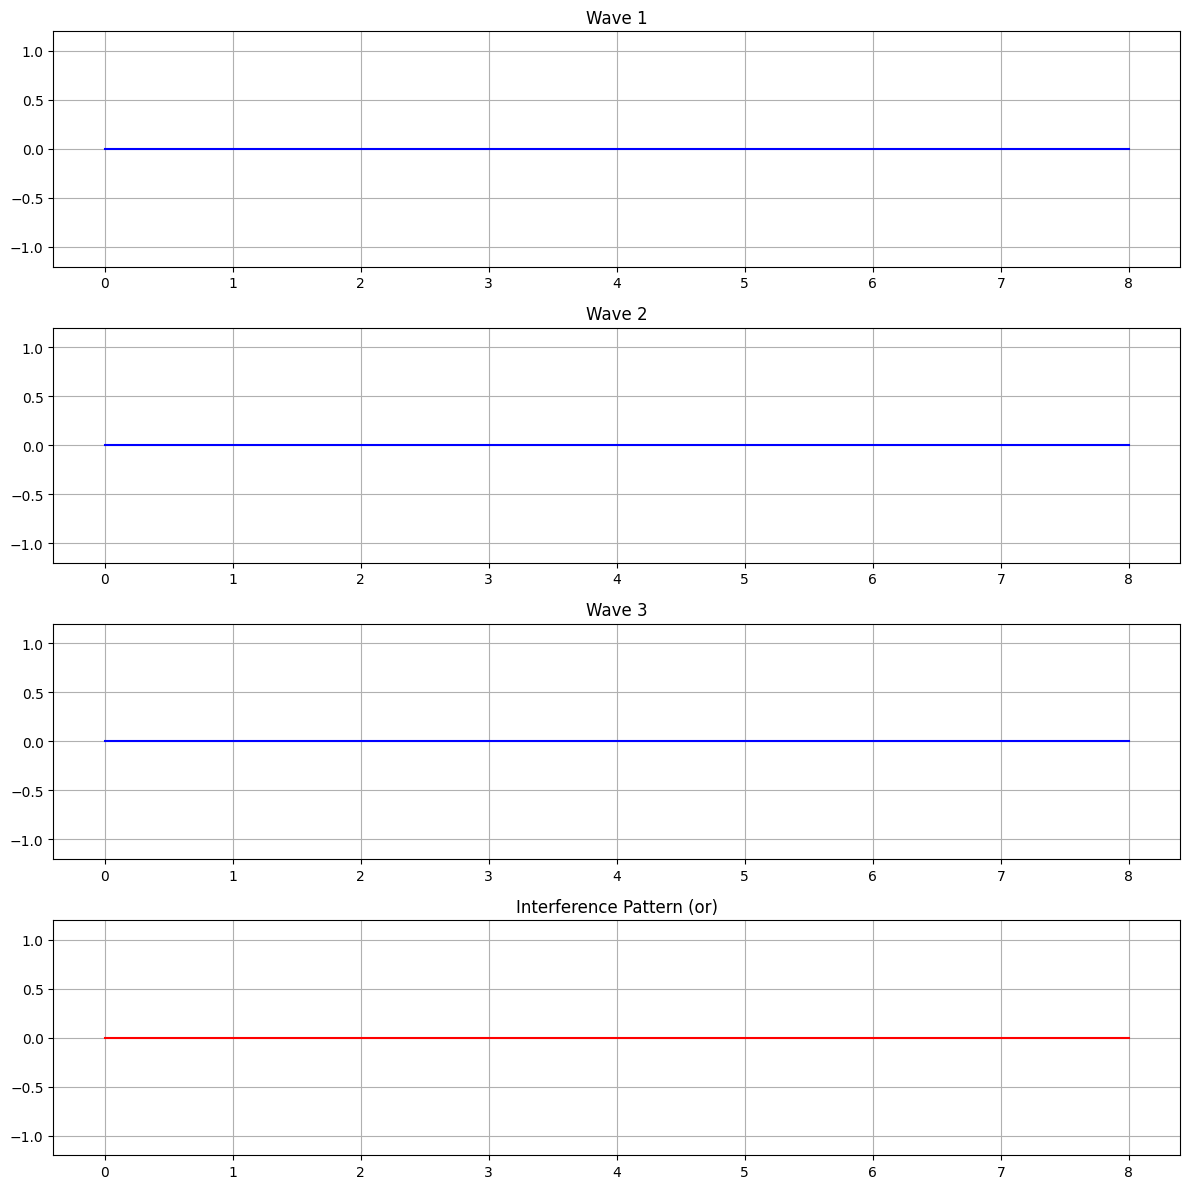

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from bizarromath.meganumber import MegaBinary
from enum import Enum
from typing import List, Tuple

class InterferenceMode(Enum):
    XOR = "xor"
    AND = "and"
    OR = "or"

def create_binary_wave(length: int, duty_cycle: float) -> MegaBinary:
    """Create a binary wave with specified length and duty cycle"""
    # Convert length to MegaBinary
    length_mb = MegaBinary(bin(length)[2:])
    
    # Convert duty cycle directly to MegaFloat for precision
    duty_float = MegaFloat.from_decimal_string(str(duty_cycle))
    
    # Use MegaBinary's duty cycle creation with automatic float handling
    return MegaBinary.create_duty_cycle(length_mb, duty_float)

def binary_to_sinusoid(binary_wave: MegaBinary, samples_per_bit: int = 20) -> Tuple[np.ndarray, np.ndarray]:
    """Convert binary wave to sinusoidal representation"""
    bits = binary_wave.to_bits()
    total_samples = len(bits) * samples_per_bit
    t = np.linspace(0, len(bits), total_samples)
    y = np.zeros_like(t)
    
    # For each bit, generate corresponding sine wave segment
    for i, bit in enumerate(bits):
        if bit:
            start_idx = i * samples_per_bit
            end_idx = (i + 1) * samples_per_bit
            y[start_idx:end_idx] = np.sin(2 * np.pi * t[start_idx:end_idx] / samples_per_bit)
    
    return t, y

def plot_interference(waves: List[MegaBinary], mode: InterferenceMode, samples_per_bit: int = 20):
    """Plot original waves and their interference pattern"""
    num_waves = len(waves)
    fig, axs = plt.subplots(num_waves + 1, 1, figsize=(12, 3*(num_waves + 1)))
    
    # Plot original waves
    for i, wave in enumerate(waves):
        t, y = binary_to_sinusoid(wave, samples_per_bit)
        axs[i].plot(t, y, 'b-')
        axs[i].set_title(f'Wave {i+1}')
        axs[i].grid(True)
        axs[i].set_ylim(-1.2, 1.2)
    
    # Calculate and plot interference
    result = waves[0]
    for wave in waves[1:]:
        result = MegaBinary.interfere([result, wave], mode)
    
    t, y = binary_to_sinusoid(result, samples_per_bit)
    axs[-1].plot(t, y, 'r-')
    axs[-1].set_title(f'Interference Pattern ({mode.value})')
    axs[-1].grid(True)
    axs[-1].set_ylim(-1.2, 1.2)
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create some test waves
    wave1 = create_binary_wave(32, 0.5)  # 50% duty cycle
    wave2 = create_binary_wave(32, 0.25)  # 25% duty cycle
    wave3 = create_binary_wave(32, 0.75)  # 75% duty cycle
    
    # Plot interference patterns for different modes
    for mode in InterferenceMode:
        print(f"\nPlotting {mode.value} interference:")
        plot_interference([wave1, wave2, wave3], mode)